In [1]:
from esda.moran import Moran
import geopandas as gpd
from libpysal.weights import DistanceBand, KNN
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from splot.esda import plot_moran
import statsmodels.api as sm
%matplotlib inline

from statshelper import q_q_plot, stepwise_model_selection
plt.style.use('dark_background')

In [2]:
df = pd.read_pickle("./data/processed/Cleaned_Chicago_Sales.pkl")
print("Data frame has {} rows and {} columns".format(len(df), len(df.columns)))
drop_these = []
for col in df.columns:
    if col[:4] == "Bool":
        drop_these.append(col)
df = df.drop(drop_these, axis=1)
print(list(df.columns))
df.head()

Data frame has 324261 rows and 131 columns
['PIN', 'Property Class', 'Neighborhood Code', 'Land Square Feet', 'Town Code', 'Type of Residence', 'Apartments', 'Wall Material', 'Roof Material', 'Rooms', 'Bedrooms', 'Basement', 'Basement Finish', 'Central Heating', 'Central Air', 'Fireplaces', 'Attic Type', 'Attic Finish', 'Half Baths', 'Design Plan', 'Cathedral Ceiling', 'Site Desirability', 'Garage 1 Size', 'Garage 1 Material', 'Garage 1 Attachment', 'Garage 1 Area', 'Garage 2 Size', 'Garage 2 Material', 'Garage 2 Attachment', 'Garage 2 Area', 'Porch', 'Building Square Feet', 'Estimate (Land)', 'Estimate (Building)', 'Sale Date', 'Deed No.', 'Sale Price', 'Longitude', 'Latitude', 'Census Tract', 'Multi Property Indicator', 'Full Baths', 'Age', 'Use', "O'Hare Noise", 'Floodplain', 'Road Proximity', 'Sale Year', 'Sale Quarter', 'Sale Half-Year', 'Sale Quarter of Year', 'Sale Half of Year', 'Age Squared', 'Age Decade Squared', 'Pure Market Filter', 'Garage Indicator', 'Square root of lot s

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,Rooms,...,Sale Quarter,Sale Half-Year,Sale Quarter of Year,Sale Half of Year,Age Squared,Age Decade Squared,Pure Market Filter,Garage Indicator,Square root of lot size,Town and Neighborhood
2,16094150130000,211,13,-0.297580,77,3.0,6.0,2.0,2.0,3.737790,...,-0.857915,36,4,2,7569,75.690002,1,1.0,67.082039,7713
5,4252000820000,204,100,2.868180,25,5.0,0.0,2.0,4.0,1.482994,...,-0.983113,36,3,2,3721,37.209999,1,1.0,184.114090,25100
8,14322110150000,208,12,-0.596010,74,3.0,0.0,2.0,6.0,0.903020,...,0.769658,43,1,1,16,0.160000,1,1.0,60.991802,7412
9,27021200080000,204,34,1.698873,28,1.0,0.0,3.0,1.0,0.176677,...,-0.106728,39,2,1,841,8.410000,1,1.0,126.802994,2834
11,13121080620000,204,42,0.515768,71,1.0,0.0,2.0,1.0,-0.268846,...,-0.983113,36,3,2,3844,38.439999,1,1.0,86.948257,7142


In [3]:
i_vars = [
    'Age',
    'Bedrooms',  
    'Building Square Feet', 
    'Estimate (Building)', 
    'Estimate (Land)', 
    'Fireplaces', 
    'Full Baths',
    'Garage 1 Area',
    'Garage 2 Area', 
    'Half Baths', 
    'Land Square Feet',
    'Rooms',
    'Sale Quarter'
    ]
dep_var = ['Sale Price']
X = df[i_vars]
y = df[dep_var]

In [4]:
stepwise_model_selection(dep_var, i_vars, df)


Current model: ['Sale Price'] ~ intercept
        current   920213.86
+           Age   910962.35
+      Bedrooms   893870.99
+  Building Square Feet   839781.69
+  Estimate (Building)   641158.68
+  Estimate (Land)   743130.44
+    Fireplaces    869027.2
+    Full Baths   869232.02
+  Garage 1 Area   919672.56
+  Garage 2 Area   920211.77
+    Half Baths    895512.8
+  Land Square Feet   911046.52
+         Rooms   883324.85
+  Sale Quarter   914793.95
adding  Estimate (Building)

Current model: ['Sale Price'] ~ intercept + Estimate (Building)
        current   641158.68
+           Age   638395.43
+      Bedrooms   641156.16
+  Building Square Feet   640568.92
+  Estimate (Land)   600539.72
+    Fireplaces   637410.89
+    Full Baths   641026.31
+  Garage 1 Area   639272.32
+  Garage 2 Area   641160.41
+    Half Baths   638602.86
+  Land Square Feet   634880.99
+         Rooms   641146.14
+  Sale Quarter   628202.24
-  Estimate (Building)   920213.86
adding  Estimate (Land)

Current

In [5]:
model_vars = [
    "Estimate (Building)",
    "Estimate (Land)",
    "Age",
    "Sale Quarter",
    "Land Square Feet",
    "Garage 1 Area",
    "Half Baths",
    "Building Square Feet",
    "Fireplaces",
    "Rooms",
    "Bedrooms",
    "Full Baths"
]
y = df[dep_var].values
X = df[model_vars].values
X_cons = sm.add_constant(X)
ols = sm.OLS(y, X_cons, name_y=dep_var, name_x=i_vars).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 5.214e+04
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        13:49:38   Log-Likelihood:            -2.8583e+05
No. Observations:              324261   AIC:                         5.717e+05
Df Residuals:                  324248   BIC:                         5.718e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.515e-09      0.001  -1.48e-06      1.000      -0.002       0.002
x1             0.5058      0.002    308.932      0.000       0.503       0.509
x2             0.3456      0.002    221.721      0.000       0.343       0.349
x3            -0.1353      0.001   -104.753      0.000      -0.138      -0.133
x4             0.1132      0.001    109.839      0.000       0.111       0.115
x5            -0.0674      0.001    -51.920      0.000      -0.070      -0.065
x6             0.0376      0.001     34.905      0.000       0.035       0.040
x7             0.0306      0.001     25.439      0.000       0.028       0.033
x8             0.0171      0.002      7.071      0.000       0.012       0.022
x9             0.0134      0.001     10.500      0.000       0.011       0.016
x10            0.0160      0.002      6.614      0.000       0.011       0.021
x11           -0.0112      0.002     -5.288      0.000      -0.015      -0.007
x12           -0.0021      0.002     -1.176      0.239      -0.006       0.001
==============================================================================
Omnibus:                    48987.333   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           261703.021
Skew:                          -0.627   Prob(JB):                         0.00
Kurtosis:                       7.219   Cond. No.                         5.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

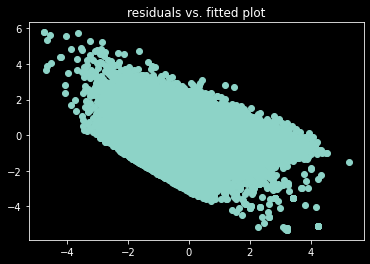

In [6]:
plt.scatter(ols.predict(), ols.resid)
plt.title("residuals vs. fitted plot")
plt.show()

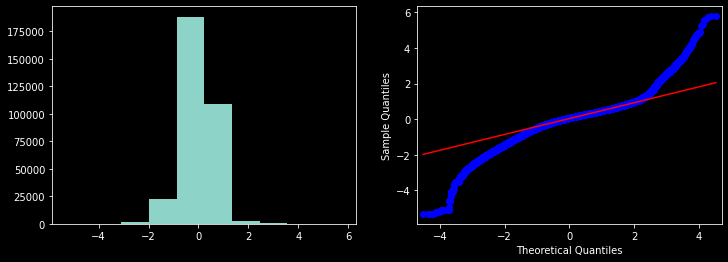

In [7]:
q_q_plot(ols.resid)

In [8]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf = gdf.set_crs("EPSG:4326")
gdf = gdf.to_crs("EPSG:26916")

<AxesSubplot:>

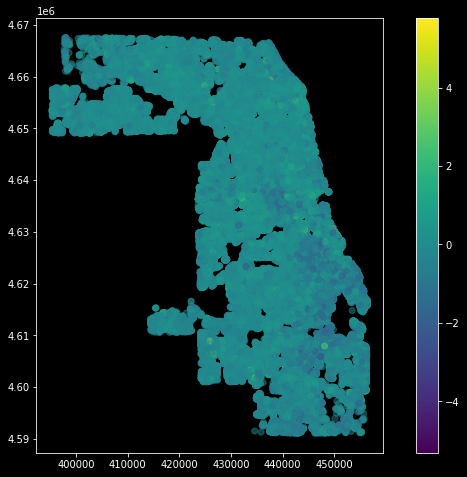

In [9]:
gdf.plot(column=ols.resid, legend=True, cmap="viridis",
         alpha=0.5, figsize=(12,8))

In [10]:
#w = DistanceBand.from_dataframe(gdf,threshold=800) # needed k large enough that it was connected
w = KNN.from_dataframe(gdf,k=256)
w.transform = 'R'

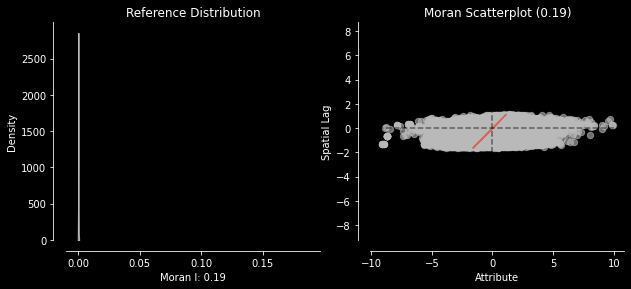

In [11]:
ols_moran = Moran(ols.resid, w, permutations=199)
plot_moran(ols_moran, zstandard=True, figsize=(10,4))
plt.show()